## 네이버 날씨 미세먼지 가져오기

* 크롤링은 웹 크롤러(web crawling)에서 출발한 말로 크롤러는 무수히 많은 인터넷 상의 페이지(문서, html 등)를 수집해서 분류하고 저장한 후에 나중에 쉽게 찾아볼 수 있도록 하는 역할을 하는 일종의 로봇입니다. 크롤링은 웹 상의 문서를 수집해주는 작업을 크롤링이라고 합니다.

* 웹 페이지 가져오기

In [3]:
from bs4 import BeautifulSoup as bs
from pprint import pprint   # pprint는 pretty print, 데이터를 좀 더 보기 좋게 출력해주는 라이브러리
import requests   # requests는 파이썬으로 HTTP 호출하는 프로그램을 작성할 때 가장 많이 사용되는 라이브러리

('<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta '
 'name="referrer" content="always">  <meta name="format-detection" '
 'content="telephone=no,address=no,email=no"> <meta name="viewport" '
 'content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta '
 'property="og:title" content="날씨 : 네이버 통합검색"/> <meta property="og:image" '
 'content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta '
 'property="og:description" content="\'날씨\'의 네이버 통합검색 결과입니다."> <meta '
 'name="description" lang="ko" content="\'날씨\'의 네이버 통합검색 결과입니다."> <title>날씨 : '
 '네이버 통합검색</title> <link rel="shortcut icon" '
 'href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  '
 '<link rel="search" type="application/opensearchdescription+xml" '
 'href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" '
 'title="Naver" /><link rel="stylesheet" type="text/css" '
 'href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210603.
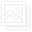
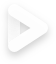
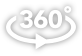
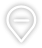
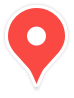

 'api_ico_count">재생수</i>6,042</span><span class="txt">6시간 전</span> </div> '
 '</div> </div> </div> <div class="flick_bx"> <div class="video_scroll_item '
 'api_ani_send"> <div class="channel_area" '
 'style="background-color:#8a99a4;color:#fff"><a ondragstart="return false" '
 'href="https://tv.naver.com/kbsnews" target="_blank" onClick="goOtherCR(this, '
 "'a=vdo_lsh*h.cha&r=4&i=2550431020_88172b92_000020556330&g='+ "
 'urlencode(\'4|88172b92_000020556330:0\') +\'&u=\'+urlencode(this.href))" '
 'class="link"><span class="thumb"><img '
 'src="https://search.pstatic.net/common/?src=https%3A%2F%2Fphinf.pstatic.net%2Ftvcast%2F20180511_92%2Fpj0S5_1526016794536E4jf9_PNG%2F1526016794504.png&type=f36_36" '
 'onError="this.src=\'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7\';this.className=\'bg_npimg\'" '
 'width=18" height="18" alt=""></span>KBS뉴스</a></div> <div class="thumb_area"> '
 '<a ondragstart="return false" href="https://tv.naver.com/v/20556330" '
 't
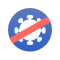
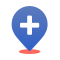
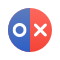
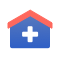

In [4]:
html = requests.get('https://search.naver.com/search.naver?query=날씨')
pprint(html.text)

* 파싱

* 파싱(Parsing)은 어떤 페이지(문서, html 등)에서 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보로 가공하는 것을 말합니다.

In [6]:
soup = bs(html.text, 'html.parser')  # HTML Parse란 HTML 문법 규칙에 따른 문자열을, 해당 문법을 바탕으로 단어의 의미나 구조를 분석하는 것을 의미합니다.

* 미세먼지 정보가 있는 div요소만 추출
* 요소 1개찾기(find)

In [7]:
data1 = soup.find('div', {'class':'detail_box'})   # div.detail_box까지 추출하여 data1에 저장
pprint(data1)

<div class="detail_box"> <dl class="indicator"> <dt><a href="?where=nexearch&amp;sm=tab_etc&amp;qvt=0&amp;query=%EB%B6%80%EC%82%B0%EA%B4%91%EC%97%AD%EC%8B%9C%20%EA%B8%88%EC%A0%95%EA%B5%AC%20%EB%B6%80%EA%B3%A13%EB%8F%99%20%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80" nocr="" onclick="return goOtherCR(this, 'a=nco_x7t*4.todustmr&amp;r=1&amp;i=88157038_00000065035F&amp;u=' + urlencode(this.href));">미세먼지</a></dt> <dd class="lv1"><span class="num">22㎍/㎥</span>좋음<span class="ico"></span></dd> <dt><a href="?where=nexearch&amp;sm=tab_etc&amp;qvt=0&amp;query=%EB%B6%80%EC%82%B0%EA%B4%91%EC%97%AD%EC%8B%9C%20%EA%B8%88%EC%A0%95%EA%B5%AC%20%EB%B6%80%EA%B3%A13%EB%8F%99%20%EC%B4%88%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80" nocr="" onclick="return goOtherCR(this, 'a=nco_x7t*4.todustmr&amp;r=1&amp;i=88157038_00000065035F&amp;u=' + urlencode(this.href));">초미세먼지</a></dt> <dd class="lv1"><span class="num">7㎍/㎥</span>좋음<span class="ico"></span></dd> <dt><a href="?where=nexearch&amp;sm=tab_etc&amp;qvt=0&amp;query=%EB%B6%

* 요소 모두 찾기(findAll)

In [8]:
data2 = data1.findAll('dd')   
pprint(data2)   # 리스트 길이 3개 확인, 0~2 인덱스에 해당되는 값은 미세먼지, 초미세먼지, 오존지수

[<dd class="lv1"><span class="num">22㎍/㎥</span>좋음<span class="ico"></span></dd>,
 <dd class="lv1"><span class="num">7㎍/㎥</span>좋음<span class="ico"></span></dd>,
 <dd class="lv2"><span class="num">0.044ppm</span>보통<span class="ico"></span></dd>]


* 내부 텍스트 추출

In [12]:
# 미세먼지 텍스트 추출
fine_dust = data2[0].find('span', {'class':'num'}).text
pprint(fine_dust)

# 초미세먼지 텍스트 추출
ultra_find_dust = data2[1].find('span', {'class':'num'}).text
pprint(ultra_find_dust)

# 오존지수 텍스트 추출
ozone = data2[2].find('span', {'class':'num'}).text
pprint(ozone)

'22㎍/㎥'
'7㎍/㎥'
'0.044ppm'
